In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.misc import imread
import matplotlib.pyplot as plt
import seaborn as sns

from subprocess import check_output
%matplotlib inline

The objective is to predict the likelihood of different types of white blood cells in each picture.

In general, there are two classes available in the dataset:

1. MONONUCLEAR
2. POLYNUCLEAR

# Training set: Class distribution

('Total count for class', u'MONONUCLEAR', ':', 4996)
('Total count for class', u'POLYNUCLEAR', ':', 4961)


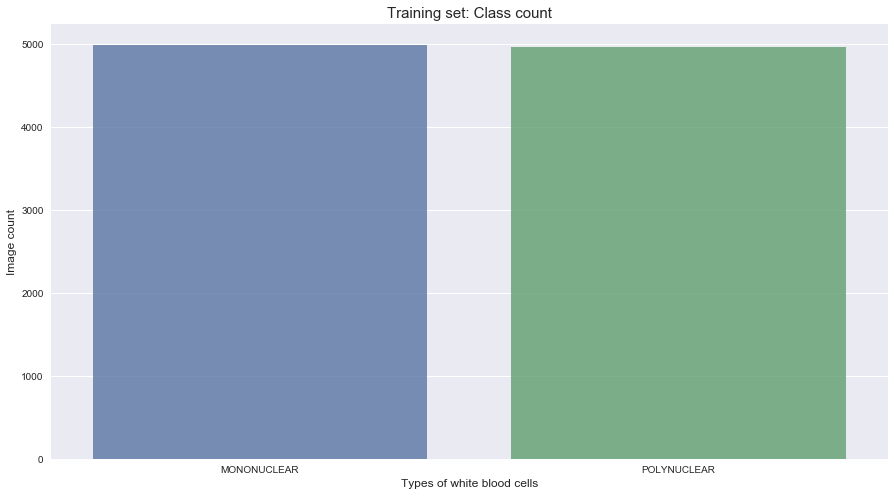

In [3]:
train_path = "../Dataset/train/"

sub_folders = check_output(["ls", train_path]).decode("utf8").strip().split('\n')

count_dict = {}

for i in sub_folders:
    class_count = len(check_output(["ls", "../Dataset/train/" + i]).decode("utf8").strip().split('\n'))
    print("Total count for class", i,":",class_count)
    count_dict[i] = class_count
    
plt.figure(figsize=(15, 8))
sns.barplot(list(count_dict.keys()), list(count_dict.values()), alpha=0.8)
plt.title("Training set: Class count", fontsize=15)
plt.xlabel("Types of white blood cells", fontsize=12)
plt.ylabel("Image count", fontsize=12)
plt.show()

According to my analysis, this is a balanced training dataset. Class MONONUCLEAR is almost equal to class POLYNUCLEAR.

# Training set: Image size

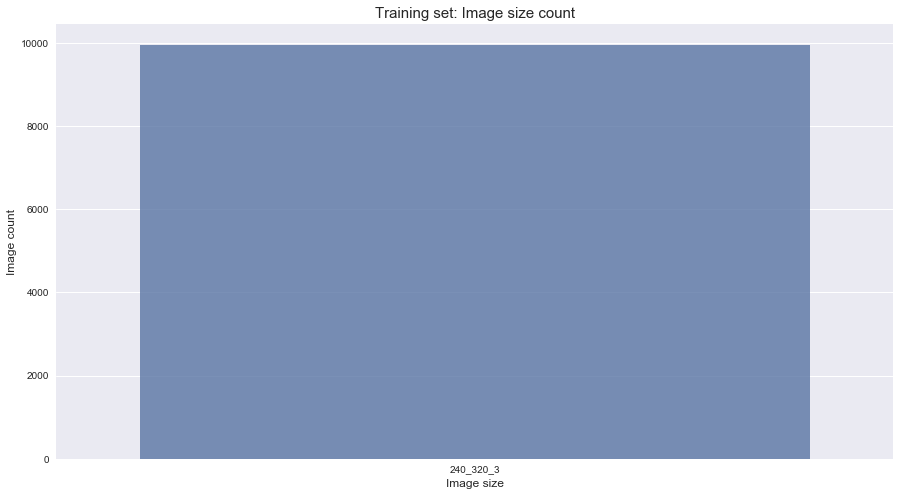

In [4]:
train_path = "../Dataset/train/"

sub_folders = check_output(["ls", train_path]).decode("utf8").strip().split('\n')

image_size_dict = {}

for i in sub_folders:
    file_names = check_output(["ls", train_path + i]).decode("utf8").strip().split('\n')
    for y in file_names:
        im_array = imread(train_path + i + "/" + y)
        size = "_".join(map(str,list(im_array.shape)))
        image_size_dict[size] = image_size_dict.get(size, 0) + 1

plt.figure(figsize=(15, 8))
sns.barplot(list(image_size_dict.keys()), list(image_size_dict.values()), alpha=0.8)
plt.title("Training set: Image size count", fontsize=15)
plt.xlabel('Image size', fontsize=12)
plt.ylabel('Image count', fontsize=12)
plt.show()

All of the images in the training set have been preprocessed to 320 x 240 resolution.